In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# version of pandas

In [16]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [17]:
df50 = pd.read_csv('total_50_dataset.csv', dtype=dtype)

In [18]:
df50.shape

(2500000, 31)

# LET HIER OP ENCODING!

In [ ]:
# preprocessing

# one-hot encode the AttributeLevel and ScenarioTypeStrict
df50 = pd.get_dummies(df50, columns=['AttributeLevel', 'ScenarioTypeStrict'], drop_first=True)

print(df50.columns)



"ENCODE AFTER THE SPLIT !!!!!!"
"USE SKLEARN ONE HOT ENCODER"

Index(['ResponseID', 'UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Female',
       'AttributeLevel_Fit', 'AttributeLevel_High', 'AttributeLevel_Hoomans',
       'AttributeLevel_Less', 'AttributeLevel_Low', 'AttributeLevel_Male',
       'AttributeLevel_More', 'AttributeLevel_Old', 'AttributeLevel_Pets',
       'AttributeLevel_Young', 'ScenarioTypeStrict_Fitness',
       'ScenarioTypeStrict_Gender', 'ScenarioTypeStrict_Social Status',
       'ScenarioTypeStrict_Species', 'ScenarioTypeStrict_Utilitarian'],
      dtype='object')


In [20]:
df50.shape

(2500000, 45)

In [21]:
df50.duplicated().sum()

0

In [9]:
# now also dropping ResponseID
# kept this on and pre-processed it thus far to keep track of if everything went right with the complete sessions being in the dataset (so each ResponseID has to be present twice)

In [25]:
numerical_columns = ['UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Female',
       'AttributeLevel_Fit', 'AttributeLevel_High', 'AttributeLevel_Hoomans',
       'AttributeLevel_Less', 'AttributeLevel_Low', 'AttributeLevel_Male',
       'AttributeLevel_More', 'AttributeLevel_Old', 'AttributeLevel_Pets',
       'AttributeLevel_Young', 'ScenarioTypeStrict_Fitness',
       'ScenarioTypeStrict_Gender', 'ScenarioTypeStrict_Social Status',
       'ScenarioTypeStrict_Species', 'ScenarioTypeStrict_Utilitarian']

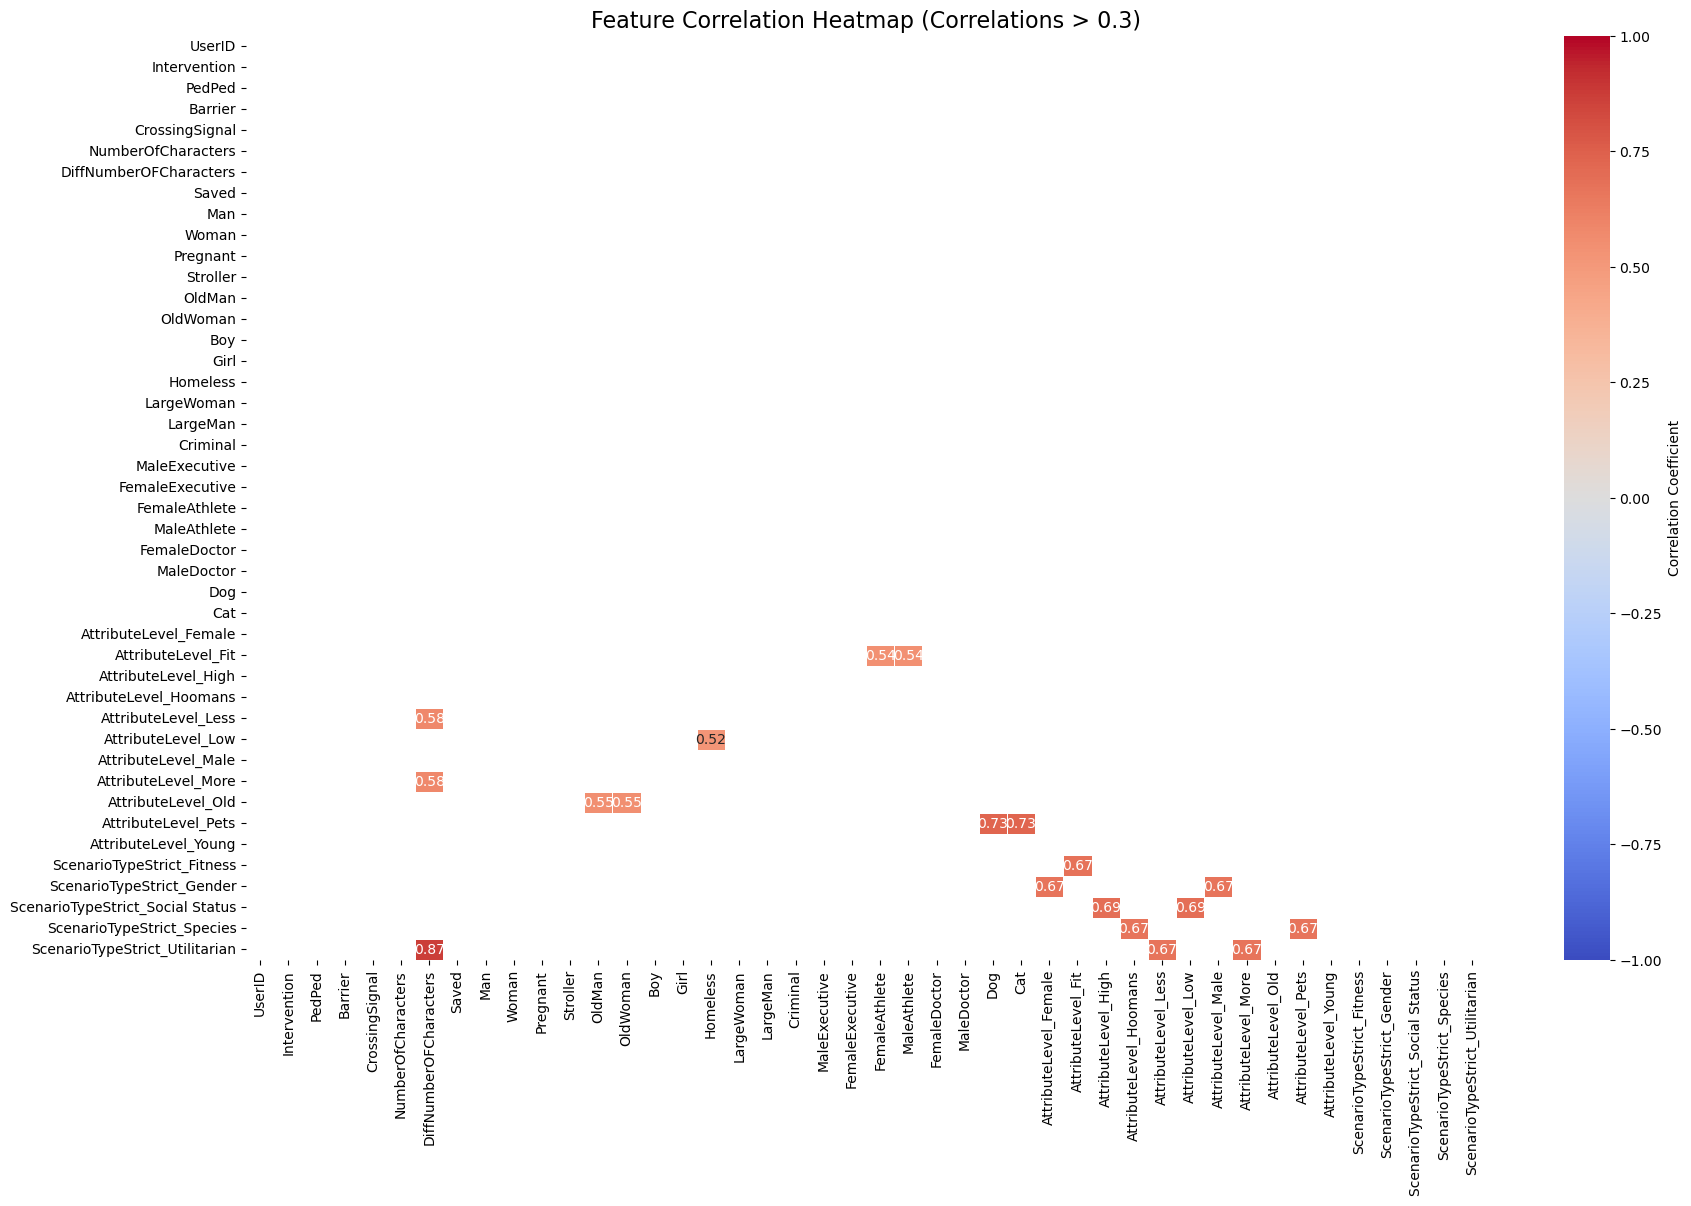

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df50[numerical_columns].corr()

# Create a mask to hide the diagonal (1s)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the condition to keep only values > 0.3
filtered_corr_matrix = corr_matrix.where(corr_matrix > 0.5)

# Set up the figure size
plt.figure(figsize=(20, 12))

# Generate the heatmap with the mask applied and adjusted color limits
sns.heatmap(filtered_corr_matrix, 
            mask=mask,          # Apply the mask
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format for annotations
            cmap='coolwarm',    # Color map
            vmin=-1, vmax=1,    # Set color scale limits
            center=0,           # Center the color map at 0 for better contrast
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})  # Add label to color bar

# Add a title
plt.title('Feature Correlation Heatmap (Correlations > 0.3)', fontsize=16)

# Show the plot
plt.show()


#### Splitting

In [10]:
# Prepare features and target variable
X = df50.drop(['UserID', 'ResponseID'], axis=1)   # Features
y = df50['UserID']                # Target variable

In [11]:
# Split the data into train, validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111111111111, random_state=42)

In [10]:
X_train.shape

(2000000, 45)

### Logistic regression

In [23]:
# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Make predictions
y_pred_lr = lr_model.predict(X_val)

In [25]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.598536


In [26]:
cm = confusion_matrix(y_val, y_pred_lr)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[93572 31379]
 [68987 56062]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65    124951
           1       0.64      0.45      0.53    125049

    accuracy                           0.60    250000
   macro avg       0.61      0.60      0.59    250000
weighted avg       0.61      0.60      0.59    250000



### Logistic regression with StandardScalar

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_val_scaled = scaler.transform(X_val)

In [28]:
# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
# Make predictions
y_pred_lr = lr_model.predict(X_val_scaled)

In [30]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.598724


In [31]:
cm = confusion_matrix(y_val, y_pred_lr)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[93681 31270]
 [69049 56000]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65    124951
           1       0.64      0.45      0.53    125049

    accuracy                           0.60    250000
   macro avg       0.61      0.60      0.59    250000
weighted avg       0.61      0.60      0.59    250000



### Logistic Regression with root

In [58]:
X_train_sqrt = np.sqrt(X_train)
X_val_sqrt = np.sqrt(X_val)

In [59]:
# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_sqrt, y_train)

LogisticRegression()

In [61]:
# Make predictions
y_pred_lr = lr_model.predict(X_val_sqrt)

In [62]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.596948


In [63]:
cm = confusion_matrix(y_val, y_pred_lr)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[95700 29251]
 [71512 53537]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.66    124951
           1       0.65      0.43      0.52    125049

    accuracy                           0.60    250000
   macro avg       0.61      0.60      0.59    250000
weighted avg       0.61      0.60      0.59    250000



### Logistic regression with K-fold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    
    # Generate confusion matrix and classification report
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

In [24]:
# Display results
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[187404  62720]
 [138060 111816]]

Classification Report:
0: {'precision': 0.575805619054642, 'recall': 0.7492443747901041, 'f1-score': 0.6511741036991737, 'support': 250124.0}
1: {'precision': 0.6406472017234267, 'recall': 0.4474859530327042, 'f1-score': 0.5269219531964223, 'support': 249876.0}
accuracy: 0.59844
macro avg: {'precision': 0.6082264103890344, 'recall': 0.5983651639114042, 'f1-score': 0.589048028447798, 'support': 500000.0}
weighted avg: {'precision': 0.6082103296765324, 'recall': 0.59844, 'f1-score': 0.5890788429811227, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[187439  62553]
 [137991 112017]]

Classification Report:
0: {'precision': 0.5759733275973328, 'recall': 0.7497799929597747, 'f1-score': 0.6514836068137819, 'support': 249992.0}
1: {'precision': 0.6416738271180615, 'recall': 0.44805366228280696, 'f1-score': 0.5276627616127072, 'support': 250008.0}
accuracy: 0.598912
macro avg: {'precision': 0.6088235773576971, 'recall': 0.598916827

In [26]:
# Calculate average accuracy
accuracies = [report['accuracy'] for report in classification_reports]
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy}")

# Caluculate average standard deviation
std_dev = np.std(accuracies)
print(f"Standard Deviation: {std_dev}")


Average Accuracy: 0.5987932
Standard Deviation: 0.0005459854943127986


In [ ]:
"""from sklearn.model_selection import cross_val_score, KFold

# Standardize features for better model performance
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up K-Fold Cross Validation (e.g., K=5)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(log_reg, X_t, y, cv=kf, scoring='accuracy')

# Display results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {scores.mean()}')
print(f'Standard deviation of accuracy: {scores.std()}')"""


Accuracy for each fold: [0.598606 0.599054 0.599716 0.598452 0.598474]
Mean accuracy: 0.5988604
Standard deviation of accuracy: 0.00047965554307233905


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_val)

In [14]:
# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {accuracy_rf:}')

Accuracy: 0.749252


In [15]:
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_val, y_pred_rf)
print("Classification Report:\n", class_report_rf)

Confusion Matrix:
 [[97052 27899]
 [34788 90261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76    124951
           1       0.76      0.72      0.74    125049

    accuracy                           0.75    250000
   macro avg       0.75      0.75      0.75    250000
weighted avg       0.75      0.75      0.75    250000



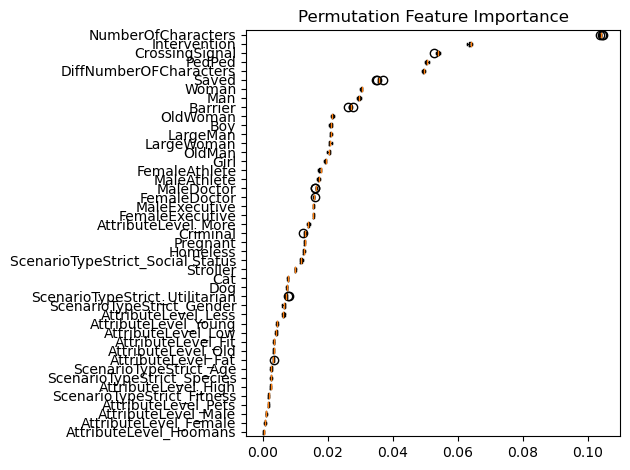

In [ ]:
# permutation feature importance

from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(rf_model, X_val, y_val, n_repeats=10, random_state=42)

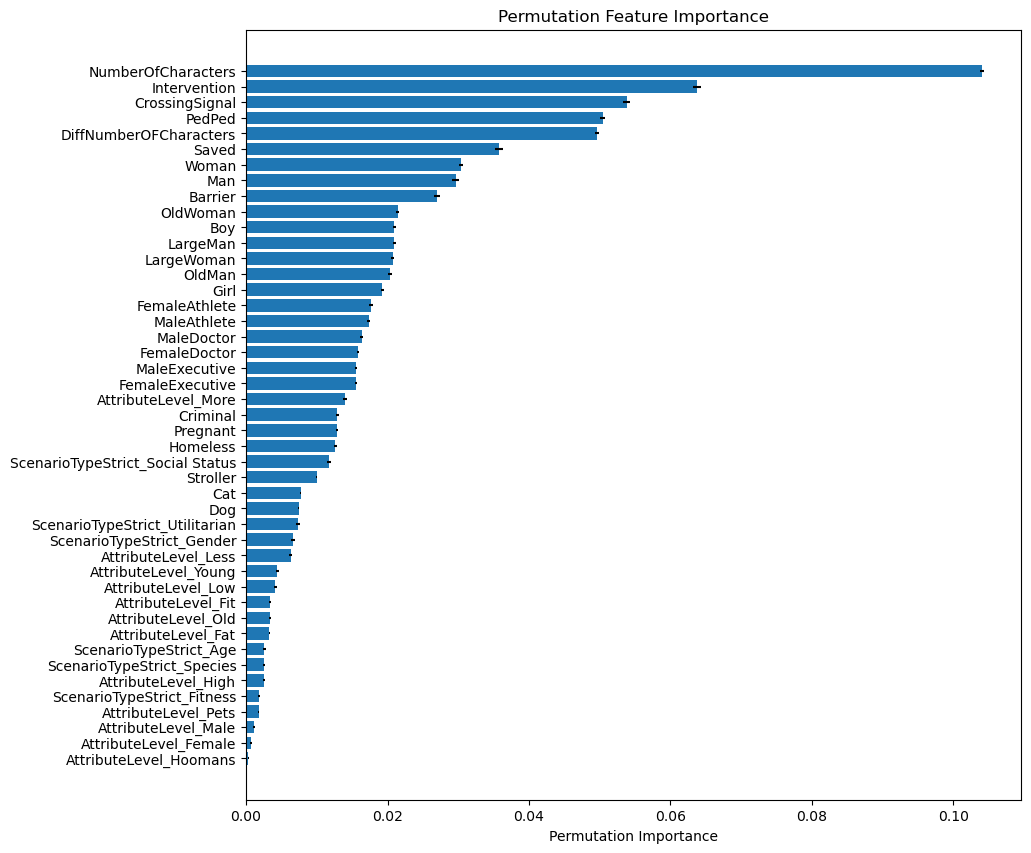

In [22]:
# Feature names
feature_names = X.columns

# Extract feature importances and standard deviations
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], xerr=std[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

### Random Forest with K-fold

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize Random Forest model
rf_model_k = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up K-Fold Cross Validation (e.g., K=5)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices_rf = []
classification_reports_rf = []

# Manually loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf_model_k.fit(X_train, y_train)
    
    # Make predictions
    y_pred_rf = rf_model_k.predict(X_test)
    
    # Store confusion matrix and classification report for each fold
    conf_matrices_rf.append(confusion_matrix(y_test, y_pred_rf))
    classification_reports_rf.append(classification_report(y_test, y_pred_rf, output_dict=True))

    print("Done processing a fold")

# Display results for each fold
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices_rf[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports_rf[i].items():
        print(f"{label}: {metrics}")

Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold

Fold 1
Confusion Matrix:
[[194684  55440]
 [ 69527 180349]]

Classification Report:
0: {'precision': 0.7368504717820227, 'recall': 0.7783499384305385, 'f1-score': 0.7570318955544538, 'support': 250124.0}
1: {'precision': 0.7648745276497207, 'recall': 0.7217539899790296, 'f1-score': 0.7426888904903586, 'support': 249876.0}
accuracy: 0.750066
macro avg: {'precision': 0.7508624997158717, 'recall': 0.750051964204784, 'f1-score': 0.7498603930224061, 'support': 500000.0}
weighted avg: {'precision': 0.7508555497500166, 'recall': 0.750066, 'f1-score': 0.749863950087662, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[194648  55344]
 [ 69977 180031]]

Classification Report:
0: {'precision': 0.7355616438356164, 'recall': 0.7786169157413038, 'f1-score': 0.756477147082199, 'support': 249992.0}
1: {'precision': 0.7648688263409453, 'recall': 0.7201009567693833, 'f1-score': 0.741810075

In [38]:
# Calculate average accuracy
accuracies_rf = [report['accuracy'] for report in classification_reports_rf]
average_accuracy_rf = np.mean(accuracies_rf)
print(f"\nAverage Accuracy RF: {average_accuracy_rf}")

# Caluculate average standard deviation
std_dev_rf = np.std(accuracies_rf)
print(f"Standard Deviation: {std_dev_rf}")


Average Accuracy RF: 0.7498184
Standard Deviation: 0.00041184540788989334


In [ ]:
import numpy as np

# Collect the recall for the '1.0' class from each fold
recall_class_1 = [report['1.0']['recall'] for report in classification_reports_rf]

# Calculate the average recall for the '1.0' class across all folds
average_recall_class_1 = np.mean(recall_class_1)
print(f"\nAverage Recall for class 1.0: {average_recall_class_1}")


### Random Forest with Random Search

In [15]:
from scipy.stats import randint, uniform  # For defining distributions for random search

param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest (uniform distribution between 50 and 200)
    'max_depth': [None] + list(randint(1, 30).rvs(10)),  # Random depth values including None
    'min_samples_split': randint(2, 10),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 4)  # Minimum samples required to be at a leaf node
}

In [22]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_search = RandomForestClassifier(random_state=42)  # Random state for reproducibility

In [ ]:
# Set up K-Fold Cross Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Set up GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model_search,
                           param_distributions=param_dist,
                           n_iter=20,          # Number of parameter settings that are sampled
                           scoring='recall',   # Use recall as the evaluation metric
                           cv=k,
                           verbose=2,
                           n_jobs=-1)          # Use all available cores

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 89}
Best Cross-Validation Score: 0.7372540001873688


In [21]:
y_pred_rf_random = random_search.predict(X_val)

print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred_rf_random))
print(confusion_matrix(y_val, y_pred_rf_random))
print(classification_report(y_val, y_pred_rf_random))

NameError: name 'random_search' is not defined

In [20]:
# plotting AUC-ROC curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_pred_proba = random_search.predict_proba(X_val)

# Get the probabilities for the positive class
y_pred_proba = y_pred_proba[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Compute the AUC
auc = roc_auc_score(y_val, y_pred_proba)

# Plot the ROC curve

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

NameError: name 'random_search' is not defined

### Random Forest with cross_val_score

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Assume X and y are your features and target variable, respectively
rf_model = RandomForestClassifier(random_state=42)

# Set up K-Fold Cross Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation
scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

# Print results
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Accuracy Scores: [0.74501963 0.74326463 0.74515875]
Mean Accuracy: 0.7444810003388724
Standard Deviation: 0.0008619779620704059


### Random Forest with Grid Search

In [11]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
from scipy.stats import randint, uniform  # For defining distributions for random search

# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_search = RandomForestClassifier(random_state=42)  # Random state for reproducibility


# Set up K-Fold Cross Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_search,
                           param_grid=param_grid,
                           scoring='recall',        # optimizing recall
                           cv=k,
                           verbose=2,
                           n_jobs=-1)          # Use all available cores

# Fit RandomizedSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
y_pred_rf_grid = grid_search.predict(X_val)

print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred_rf_grid))
print(confusion_matrix(y_val, y_pred_rf_grid))
print(classification_report(y_val, y_pred_rf_grid))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7021529115098577
Accuracy on Validation Set: 0.745668
[[97039 27912]
 [35671 89378]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75    124951
           1       0.76      0.71      0.74    125049

    accuracy                           0.75    250000
   macro avg       0.75      0.75      0.75    250000
weighted avg       0.75      0.75      0.75    250000



### SVM with K-fold (10% of the data)

In [ ]:
# creating a subset to test the model

df50_subset = df50.sample(frac=0.1, random_state=42)
df50_subset.shape

(25000, 47)

In [13]:
# Prepare features and target variable
X_sub = df50_subset.drop(['UserID', 'ResponseID'], axis=1)    # Features
y_sub = df50_subset['UserID']                                 # Target variable

# Split the data into train, validation and test sets
X_trainval_sub, X_test_sub, y_trainval_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.1, random_state=42)
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_trainval_sub, y_trainval_sub, test_size=0.111111111111, random_state=42)

In [21]:
# Initialize SVC

from sklearn.svm import SVC

svc_sub = SVC(kernel='rbf', random_state=45)

# choosing rbf cause not linearly separable

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Lists to store results
conf_matrices_svm_sub = []
classification_reports_svm_sub = []

# Set up K-Fold Cross Validation (e.g., K=3)
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Manually loop through each fold
for train_index, test_index in kf.split(X_sub):

    print("Starting a fold")
    # Split the data for this fold
    X_train_sub, X_test_sub = X_sub.iloc[train_index], X_sub.iloc[test_index]
    y_train_sub, y_test_sub = y_sub.iloc[train_index], y_sub.iloc[test_index]
    
    # Train the model
    svc_sub.fit(X_train_sub, y_train_sub)
    print("Model fitted")
    
    # Make predictions
    y_pred_svm_sub = svc_sub.predict(X_test_sub)
    
    # Store confusion matrix and classification report for each fold
    conf_matrices_svm_sub.append(confusion_matrix(y_test_sub, y_pred_svm_sub))
    classification_reports_svm_sub.append(classification_report(y_test_sub, y_pred_svm_sub, output_dict=True))

    print("Done processing a fold")

Starting a fold
Model fitted
Done processing a fold
Starting a fold
Model fitted
Done processing a fold
Starting a fold
Model fitted
Done processing a fold


In [23]:
# Display results for each fold
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices_svm_sub[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports_svm_sub[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[33869  7839]
 [19892 21734]]

Classification Report:
0: {'precision': 0.6299920016368743, 'recall': 0.81205044595761, 'f1-score': 0.7095287475515613, 'support': 41708.0}
1: {'precision': 0.7349271294762114, 'recall': 0.5221255945803104, 'f1-score': 0.6105141926150648, 'support': 41626.0}
accuracy: 0.6672306621547027
macro avg: {'precision': 0.6824595655565429, 'recall': 0.6670880202689602, 'f1-score': 0.660021470083313, 'support': 83334.0}
weighted avg: {'precision': 0.6824079378866673, 'recall': 0.6672306621547027, 'f1-score': 0.6600701848546235, 'support': 83334.0}

Fold 2
Confusion Matrix:
[[33671  8098]
 [19928 21636]]

Classification Report:
0: {'precision': 0.6282020186943786, 'recall': 0.8061241590653355, 'f1-score': 0.7061278416240249, 'support': 41769.0}
1: {'precision': 0.7276518463711577, 'recall': 0.5205466268886536, 'f1-score': 0.6069174450896239, 'support': 41564.0}
accuracy: 0.663686654746619
macro avg: {'precision': 0.6779269325327681, 'recal

In [24]:
# Calculate average accuracy
accuracies_svm_sub = [report['accuracy'] for report in classification_reports_svm_sub]
average_accuracy_svm_sub = np.mean(accuracies_svm_sub)
print(f"\nAverage Accuracy RF: {average_accuracy_svm_sub}")

# Caluculate average standard deviation
std_dev_svm_sub = np.std(accuracies_svm_sub)
print(f"Standard Deviation: {std_dev_svm_sub}")


Average Accuracy RF: 0.6657119939253271
Standard Deviation: 0.0014905331742503187


### ...

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(svc_sub, X_sub, y_sub, cv=kf)

# Print the results
print(f'Cross-validation scores for each fold: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')
print(f'Standard deviation of accuracy: {scores.std():.2f}')

### ...

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

k = 3
kf = KFold(n_splits=k)

svm = SVC(kernel='rbf', max_iter=1000)
scores = cross_val_score(svm, X_sub, y_sub, cv=kf, verbose=3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ................................ score: (test=0.516) total time=   3.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
c:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ................................ score: (test=0.529) total time=   3.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s
c:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ................................ score: (test=0.548) total time=   3.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s finished


In [19]:
print(f'Cross-validation scores for each fold: {scores}')
print(f'Mean accuracy: {scores.mean():}')
print(f'Standard deviation of accuracy: {scores.std():}')

Cross-validation scores for each fold: [0.51643868 0.52850114 0.54842194]
Mean accuracy: 0.5311205872760948
Standard deviation of accuracy: 0.013187828467325245


### ...

In [11]:
# Initialize SVC

from sklearn.svm import SVC

svc_sub = SVC(kernel='rbf', random_state=45)

# choosing rbf cause not linearly separable

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Lists to store results
conf_matrices_svm_sub = []
classification_reports_svm_sub = []

# Set up K-Fold Cross Validation
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Manually loop through each fold
for train_index, test_index in kf.split(X_sub):
    print(train_index, test_index)

    print("Starting a fold")
    # Split the data for this fold
    X_train_sub, X_test_sub = X_sub.iloc[train_index], X_sub.iloc[test_index]
    y_train_sub, y_test_sub = y_sub.iloc[train_index], y_sub.iloc[test_index]
    
    # Train the model
    svc_sub.fit(X_train_sub, y_train_sub)
    print("Model fitted")
    
    # Make predictions
    y_pred_svm_sub = svc_sub.predict(X_test_sub)
    
    # Store confusion matrix and classification report for each fold
    conf_matrices_svm_sub.append(confusion_matrix(y_test_sub, y_pred_svm_sub))
    classification_reports_svm_sub.append(classification_report(y_test_sub, y_pred_svm_sub, output_dict=True))

    print("Done processing a fold")

[    1     2     4 ... 24995 24996 24998] [    0     3     6 ... 24988 24997 24999]
Starting a fold
Model fitted
Done processing a fold
[    0     1     3 ... 24997 24998 24999] [    2     4     5 ... 24993 24994 24995]
Starting a fold


KeyboardInterrupt: 

In [21]:
from sklearn.preprocessing import StandardScaler

# Lists to store results
conf_matrices_svm_sub = []
classification_reports_svm_sub = []

# Set up K-Fold Cross Validation (e.g., K=3)
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Manually loop through each fold
for train_index, test_index in kf.split(X_sub):
    print("Starting a fold")
    
    # Split the data for this fold
    X_train_sub, X_test_sub = X_sub.iloc[train_index], X_sub.iloc[test_index]
    y_train_sub, y_test_sub = y_sub.iloc[train_index], y_sub.iloc[test_index]

    # Initialize and fit the scaler on the training data
    scaler = StandardScaler()
    X_train_sub_scaled = scaler.fit_transform(X_train_sub)
    
    # Transform the test data using the same scaler
    X_test_sub_scaled = scaler.transform(X_test_sub)

    # Train the model on the scaled training data
    svc_sub.fit(X_train_sub_scaled, y_train_sub)
    print("Model fitted")

    # Make predictions on the scaled test data
    y_pred_svm_sub = svc_sub.predict(X_test_sub_scaled)

    # Store confusion matrix and classification report for each fold
    conf_matrices_svm_sub.append(confusion_matrix(y_test_sub, y_pred_svm_sub))
    classification_reports_svm_sub.append(classification_report(y_test_sub, y_pred_svm_sub, output_dict=True))

    print("Done processing a fold")


Starting a fold
Model fitted
Done processing a fold
Starting a fold
Model fitted
Done processing a fold
Starting a fold
Model fitted
Done processing a fold


In [22]:
# Display results for each fold
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices_svm_sub[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports_svm_sub[i].items():
        print(f"{label}: {metrics}")

# Calculate average accuracy
accuracies_svm_sub = [report['accuracy'] for report in classification_reports_svm_sub]
average_accuracy_svm_sub = np.mean(accuracies_svm_sub)
print(f"\nAverage Accuracy svm: {average_accuracy_svm_sub}")

# Caluculate average standard deviation
std_dev_svm_sub = np.std(accuracies_svm_sub)
print(f"Standard Deviation: {std_dev_svm_sub}")


Fold 1
Confusion Matrix:
[[3050 1126]
 [1750 2408]]

Classification Report:
0: {'precision': 0.6354166666666666, 'recall': 0.7303639846743295, 'f1-score': 0.6795900178253119, 'support': 4176.0}
1: {'precision': 0.6813808715336729, 'recall': 0.5791245791245792, 'f1-score': 0.626105044201768, 'support': 4158.0}
accuracy: 0.6549076073914087
macro avg: {'precision': 0.6583987691001698, 'recall': 0.6547442818994543, 'f1-score': 0.65284753101354, 'support': 8334.0}
weighted avg: {'precision': 0.6583491317299031, 'recall': 0.6549076073914087, 'f1-score': 0.6529052901643214, 'support': 8334.0}

Fold 2
Confusion Matrix:
[[3183  951]
 [1915 2284]]

Classification Report:
0: {'precision': 0.6243624950961161, 'recall': 0.7699564586357039, 'f1-score': 0.6895580589254766, 'support': 4134.0}
1: {'precision': 0.7060278207109737, 'recall': 0.5439390331031198, 'f1-score': 0.6144740382028517, 'support': 4199.0}
accuracy: 0.656066242649706
macro avg: {'precision': 0.6651951579035449, 'recall': 0.65694774

### MLP

In [11]:
from tensorflow.keras import layers, optimizers, models, callbacks

learning_rate = 5e-4

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Define early stopping

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

In [13]:
X_train = np.array(X_train, dtype=np.float32)  # Convert features to float32
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

In [14]:
model = build_model()

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.6401 - loss: 0.6053 - val_accuracy: 0.6689 - val_loss: 0.5726
Epoch 2/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 81s 1ms/step - accuracy: 0.6622 - loss: 0.5788 - val_accuracy: 0.6701 - val_loss: 0.5699
Epoch 3/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 85s 1ms/step - accuracy: 0.6663 - loss: 0.5752 - val_accuracy: 0.6730 - val_loss: 0.5685
Epoch 4/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 82s 1ms/step - accuracy: 0.6674 - loss: 0.5739 - val_accuracy: 0.6724 - val_loss: 0.5683
Epoch 5/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 82s 1ms/step - accuracy: 0.6685 - loss: 0.5732 - val_accuracy: 0.6739 - val_loss: 0.5679
Epoch 6/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.6682 - loss: 0.5733 - val_accuracy: 0.6741 - val_loss: 0.5672
Epoch 7/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 199s 3ms/step - accuracy: 0.6685 - loss: 0.5729 - val_accuracy: 0.6743 - val_loss: 0.5670
Epoch 8/10
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 256s 4ms/step - accurac

In [17]:
# evaluate the model

val_loss, val_accuracy = model.evaluate(X_val, y_val)

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 566us/step - accuracy: 0.6842 - loss: 0.5590


In [18]:
# confusion matrix

y_pred_mlp = model.predict(X_val)
y_pred_mlp = (y_pred_mlp > 0.5)
np.concatenate((y_pred_mlp.reshape(len(y_pred_mlp),1), y_val.reshape(len(y_val),1)),1)

cm = confusion_matrix(y_val, y_pred_mlp)
print(cm)

# classification report

print(classification_report(y_val, y_pred_mlp))

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 522us/step
[[192173  58336]
 [100123 149368]]
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71    250509
         1.0       0.72      0.60      0.65    249491

    accuracy                           0.68    500000
   macro avg       0.69      0.68      0.68    500000
weighted avg       0.69      0.68      0.68    500000



#### Removing batch normalization to see if it improves the model (hoping training > validation)

In [16]:
from tensorflow.keras import layers, optimizers, models, callbacks

learning_rate = 5e-4

def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# Define early stopping

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

In [18]:
model = build_model2()

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/5


c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62500/62500 ━━━━━━━━━━━━━━━━━━━━ 152s 2ms/step - accuracy: 0.6499 - loss: 0.5912 - val_accuracy: 0.6706 - val_loss: 0.5688
Epoch 2/5
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 41s 647us/step - accuracy: 0.6729 - loss: 0.5674 - val_accuracy: 0.6739 - val_loss: 0.5672
Epoch 3/5
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 39s 616us/step - accuracy: 0.6743 - loss: 0.5656 - val_accuracy: 0.6745 - val_loss: 0.5657
Epoch 4/5
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 39s 624us/step - accuracy: 0.6752 - loss: 0.5651 - val_accuracy: 0.6739 - val_loss: 0.5661
Epoch 5/5
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 43s 688us/step - accuracy: 0.6766 - loss: 0.5638 - val_accuracy: 0.6749 - val_loss: 0.5649


In [19]:
# evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# confusion matrix
y_pred_mlp = model.predict(X_val)
y_pred_mlp = (y_pred_mlp > 0.5)
np.concatenate((y_pred_mlp.reshape(len(y_pred_mlp),1), y_val.reshape(len(y_val),1)),1)

cm = confusion_matrix(y_val, y_pred_mlp)
print(cm)

# classification report
print(classification_report(y_val, y_pred_mlp))

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 4s 475us/step - accuracy: 0.6745 - loss: 0.5654
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 3s 423us/step
[[95679 29272]
 [51999 73050]]
              precision    recall  f1-score   support

         0.0       0.65      0.77      0.70    124951
         1.0       0.71      0.58      0.64    125049

    accuracy                           0.67    250000
   macro avg       0.68      0.67      0.67    250000
weighted avg       0.68      0.67      0.67    250000



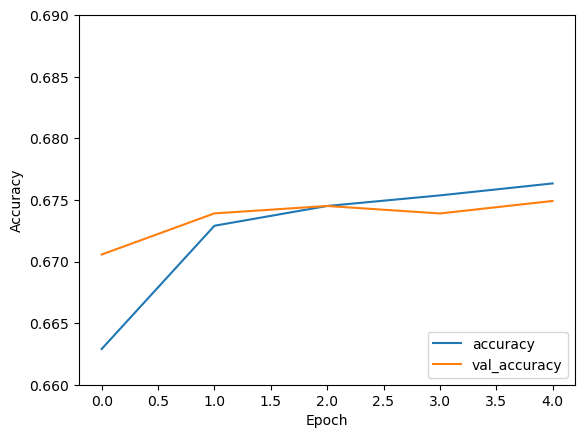

In [26]:
# plot the accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.66, 0.69])
plt.legend(loc='lower right')



### MLP with K-fold

In [ ]:
import numpy as np
from tensorflow.keras import layers, optimizers, models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define parameters
initial_learning_rate = 5e-4
decay_rate = 0.1  # Decay rate per step (you can adjust this)
n_splits = 5  # Number of folds

# Define the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_rate=decay_rate)


# Function to build the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy', metrics.Recall()])
    return model

In [30]:
# Convert data to float32 (required by TensorFlow)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Set up K-Fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

# Lists to store results
conf_matrices = []
classification_reports = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    print(f"\nFold {fold}")
    
    # Split data into training and testing for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build and train the model
    model = build_model()
    model.fit(X_train, y_train, epochs=7, batch_size=32, verbose=1)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    conf_matrices.append(cm)
    classification_reports.append(report)
    
    # Print results for the current fold
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fold += 1

# Optional: Calculate and print average metrics across all folds if needed



Fold 1
Epoch 1/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 45s 699us/step - accuracy: 0.6409 - loss: 0.6033
Epoch 2/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 44s 696us/step - accuracy: 0.6632 - loss: 0.5786
Epoch 3/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 43s 688us/step - accuracy: 0.6664 - loss: 0.5759
Epoch 4/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 43s 692us/step - accuracy: 0.6674 - loss: 0.5748
Epoch 5/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 43s 691us/step - accuracy: 0.6677 - loss: 0.5742
Epoch 6/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 44s 696us/step - accuracy: 0.6681 - loss: 0.5731
Epoch 7/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 1254s 20ms/step - accuracy: 0.6689 - loss: 0.5724
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 584us/step
Confusion Matrix:
[[204878  45246]
 [117060 132816]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.82      0.72    250124
         1.0       0.75      0.53      0.62    249876

    accuracy                           0.68    500000
   ma

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62500/62500 ━━━━━━━━━━━━━━━━━━━━ 791s 13ms/step - accuracy: 0.6391 - loss: 0.6065
Epoch 2/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 80s 1ms/step - accuracy: 0.6618 - loss: 0.5795
Epoch 3/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 78s 1ms/step - accuracy: 0.6648 - loss: 0.5765
Epoch 4/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 83s 1ms/step - accuracy: 0.6669 - loss: 0.5748
Epoch 5/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step - accuracy: 0.6670 - loss: 0.5745
Epoch 6/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 80s 1ms/step - accuracy: 0.6685 - loss: 0.5731
Epoch 7/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step - accuracy: 0.6692 - loss: 0.5730
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 13s 818us/step
Confusion Matrix:
[[206814  43178]
 [120272 129736]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.83      0.72    249992
         1.0       0.75      0.52      0.61    250008

    accuracy                           0.67    500000
   macro avg       0.69      0.67  

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62500/62500 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.6399 - loss: 0.6047
Epoch 2/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6631 - loss: 0.5785
Epoch 3/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6655 - loss: 0.5756
Epoch 4/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6671 - loss: 0.5746
Epoch 5/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.6681 - loss: 0.5734
Epoch 6/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.6682 - loss: 0.5732
Epoch 7/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - accuracy: 0.6685 - loss: 0.5729
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 12s 784us/step
Confusion Matrix:
[[187971  62003]
 [100602 149424]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70    249974
         1.0       0.71      0.60      0.65    250026

    accuracy                           0.67    500000
   macro avg       0.68      0.67    

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6412 - loss: 0.6043
Epoch 2/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step - accuracy: 0.6613 - loss: 0.5803
Epoch 3/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step - accuracy: 0.6652 - loss: 0.5757
Epoch 4/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 78s 1ms/step - accuracy: 0.6676 - loss: 0.5739
Epoch 5/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.6674 - loss: 0.5738
Epoch 6/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6684 - loss: 0.5728
Epoch 7/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6696 - loss: 0.5720
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 13s 797us/step
Confusion Matrix:
[[194037  55744]
 [107201 143018]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70    249781
         1.0       0.72      0.57      0.64    250219

    accuracy                           0.67    500000
   macro avg       0.68      0.67    

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62500/62500 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step - accuracy: 0.6390 - loss: 0.6060
Epoch 2/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 78s 1ms/step - accuracy: 0.6629 - loss: 0.5785
Epoch 3/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.6661 - loss: 0.5761
Epoch 4/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6677 - loss: 0.5746
Epoch 5/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 75s 1ms/step - accuracy: 0.6682 - loss: 0.5737
Epoch 6/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 330s 5ms/step - accuracy: 0.6688 - loss: 0.5731
Epoch 7/7
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 79s 1ms/step - accuracy: 0.6691 - loss: 0.5727
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 13s 802us/step
Confusion Matrix:
[[204920  45209]
 [118006 131865]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.82      0.72    250129
         1.0       0.74      0.53      0.62    249871

    accuracy                           0.67    500000
   macro avg       0.69      0.67   

In [33]:
# Calculate average accuracy
accuracies = [report['accuracy'] for report in classification_reports]
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy}")

# Caluculate average standard deviation
std_dev= np.std(accuracies)
print(f"Standard Deviation: {std_dev}")


Average Accuracy: 0.6741916
Standard Deviation: 0.0008214732131968642


In [34]:
import numpy as np

# Collect the recall for the '1.0' class from each fold
recall_class_1 = [report_mlp['1.0']['recall'] for report_mlp in classification_reports]

# Calculate the average recall for the '1.0' class across all folds
average_recall_class_1 = np.mean(recall_class_1)
print(f"\nAverage Recall for class 1.0: {average_recall_class_1}")



Average Recall for class 1.0: 0.5494784983043374
